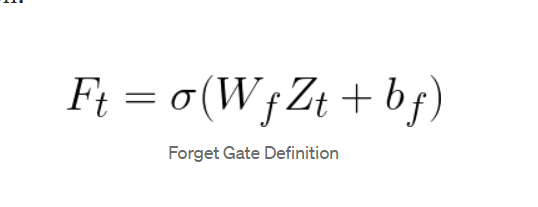

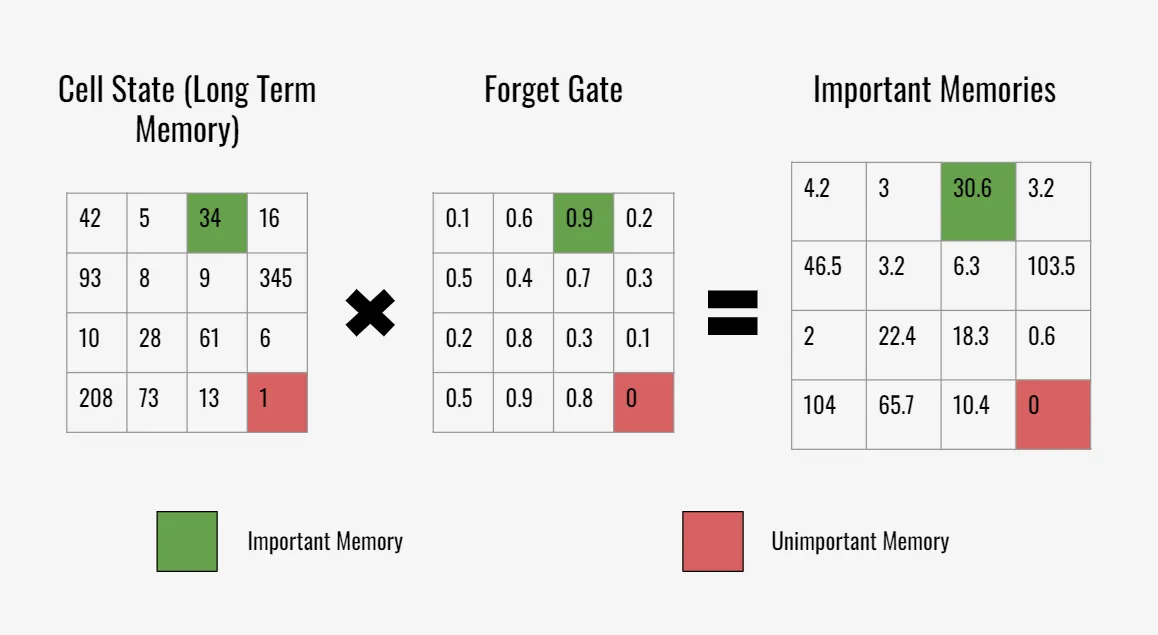

In [3]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # input gate
        self.Wii = nn.Linear(input_size, hidden_size)
        self.Wih = nn.Linear(hidden_size, hidden_size)
        
        # forget gate
        self.Wfi = nn.Linear(input_size, hidden_size)
        self.Wfh = nn.Linear(hidden_size, hidden_size)

        # output gate
        self.Woi = nn.Linear(input_size, hidden_size)
        self.Woh = nn.Linear(hidden_size, hidden_size)

        # cell gate
        self.Wci = nn.Linear(input_size, hidden_size)
        self.Wch = nn.Linear(hidden_size, hidden_size)


    # output - [last hidden state for every sentence]  
    # h_n - [every word ka hidden state] 
    # c_n - [every word ka cell state]
    def forward(self, X, pre_hidd, pre_cell):
        hidden_state = torch.zeros((self.hidden_size))
        cell_state = torch.zeros((self.hidden_size))
        output = list()
        # cell state
        for word in X:
            it = torch.sigmoid(self.Wii(word) + self.Wih(hidden_state))
            ot = torch.sigmoid(self.Woi(word) + self.Woh(hidden_state))
            ft = torch.sigmoid(self.Wfi(word) + self.Wfh(hidden_state))
            cell_state = torch.tanh(self.Wci(word) + self.Wch(hidden_state))
            cell_state = ft * pre_cell + it * cell_state
            hidden_state = ot * (torch.tanh(cell_state))
            output.append(deepcopy(hidden_state.tolist()))
        
        return torch.tensor(result)







SyntaxError: incomplete input (97675317.py, line 26)